In [14]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

file_path = '/kaggle/input/SolarEnergy/SolarPrediction.csv'
data = pd.read_csv(file_path)
print(len(data))
print(data.head())

/kaggle/input/SolarEnergy/SolarPrediction.csv
32686
     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  


In [15]:
#The the goal here is to predict the radiation column with suitable features

In [16]:
#Data Preprocessing
missing_value_count_by_column = (data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column > 0])

#there are no missing values

Series([], dtype: int64)


In [17]:
#Seperating the Data Column
import pandas as pd

# Convert 'Data' column to datetime
data['datetime'] = pd.to_datetime(data['Data'])

# Separate into date, time, and AM/PM columns
data['date_data'] = data['datetime'].dt.date
data['time_data'] = data['datetime'].dt.strftime('%I:%M:%S')

# Drop the original 'Data' and 'datetime' columns if not needed
data.drop(columns=['Data', 'datetime'], inplace=True)

# Display the updated DataFrame
print(data)

<ipython-input-17-aae6815e1fd5>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datetime'] = pd.to_datetime(data['Data'])


         UNIXTime      Time  Radiation  Temperature  Pressure  Humidity  \
0      1475229326  23:55:26       1.21           48     30.46        59   
1      1475229023  23:50:23       1.21           48     30.46        58   
2      1475228726  23:45:26       1.23           48     30.46        57   
3      1475228421  23:40:21       1.21           48     30.46        60   
4      1475228124  23:35:24       1.17           48     30.46        62   
...           ...       ...        ...          ...       ...       ...   
32681  1480587604  00:20:04       1.22           44     30.43       102   
32682  1480587301  00:15:01       1.17           44     30.42       102   
32683  1480587001  00:10:01       1.20           44     30.42       102   
32684  1480586702  00:05:02       1.23           44     30.42       101   
32685  1480586402  00:00:02       1.20           44     30.43       101   

       WindDirection(Degrees)  Speed TimeSunRise TimeSunSet   date_data  \
0                      1

In [18]:
#find categoricak variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical Variables:")
print(object_cols)

Categorical Variables:
['Time', 'TimeSunRise', 'TimeSunSet', 'date_data', 'time_data']


In [19]:
unique_count_Time = data['Time'].unique()
unique_count_TimeSunRise = data['TimeSunRise'].unique()
unique_count_TimeSunSet = data['TimeSunSet'].unique()
unique_count_time_data = data['time_data'].unique()
unique_count_date_data = data['date_data'].unique()



print(f"Unique count Time: {unique_count_Time}")
print(f"Unique count TimeSunRise: {unique_count_TimeSunRise}")
print(f"Unique count TimeSunSet: {unique_count_TimeSunSet}")
print(f"Unique count time_data: {unique_count_time_data}")
print(f"Unique count date_data: {unique_count_date_data}")


Unique count Time: ['23:55:26' '23:50:23' '23:45:26' ... '09:50:08' '09:35:13' '01:50:03']
Unique count TimeSunRise: ['06:13:00' '06:12:00' '06:11:00' '06:10:00' '06:09:00' '06:08:00'
 '06:07:00' '06:23:00' '06:22:00' '06:21:00' '06:20:00' '06:19:00'
 '06:18:00' '06:17:00' '06:16:00' '06:15:00' '06:14:00' '06:40:00'
 '06:39:00' '06:38:00' '06:37:00' '06:36:00' '06:35:00' '06:34:00'
 '06:33:00' '06:32:00' '06:31:00' '06:30:00' '06:29:00' '06:28:00'
 '06:27:00' '06:26:00' '06:25:00' '06:24:00' '06:57:00' '06:56:00'
 '06:55:00' '06:54:00' '06:53:00' '06:52:00' '06:51:00' '06:50:00'
 '06:49:00' '06:48:00' '06:47:00' '06:46:00' '06:45:00' '06:44:00'
 '06:43:00' '06:42:00' '06:41:00']
Unique count TimeSunSet: ['18:13:00' '18:14:00' '18:15:00' '18:16:00' '18:17:00' '18:18:00'
 '18:19:00' '18:20:00' '18:21:00' '18:22:00' '18:23:00' '18:24:00'
 '18:25:00' '18:26:00' '18:27:00' '18:28:00' '18:29:00' '18:30:00'
 '18:31:00' '18:32:00' '18:33:00' '18:34:00' '18:35:00' '18:36:00'
 '18:37:00' '18:38:

In [20]:
backup_data = data.copy()

columns_to_check = ['Time', 'TimeSunRise', 'TimeSunSet', 'date_data', 'time_data']
print(data[columns_to_check].dtypes)
#Encode 'Time', 'TimeSunRise','TimeSunSet' columns by converting to total seconds

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Function to convert time to seconds (24-hour format)
def time_to_seconds_24hr(time_str):
    return pd.to_datetime(time_str, format='%H:%M:%S').hour * 3600 + \
           pd.to_datetime(time_str, format='%H:%M:%S').minute * 60 + \
           pd.to_datetime(time_str, format='%H:%M:%S').second

# Apply the function to the time columns
data['Time_seconds'] = data['Time'].apply(time_to_seconds_24hr)
data['TimeSunRise_seconds'] = data['TimeSunRise'].apply(time_to_seconds_24hr)
data['TimeSunSet_seconds'] = data['TimeSunSet'].apply(time_to_seconds_24hr)

# For date_data and time_data, we can use Ordinal Encoding
encoder = OrdinalEncoder()

# Encode 'date_data' and 'time_data' as ordinal values
data['date_data_encoded'] = encoder.fit_transform(data[['date_data']])
data['time_data_encoded'] = encoder.fit_transform(data[['time_data']])

# Check the encoded data
print(data[['Time_seconds', 'TimeSunRise_seconds', 'TimeSunSet_seconds', 'date_data_encoded', 'time_data_encoded']].head())



Time           object
TimeSunRise    object
TimeSunSet     object
date_data      object
time_data      object
dtype: object
   Time_seconds  TimeSunRise_seconds  TimeSunSet_seconds  date_data_encoded  \
0         86126                22380               65580               28.0   
1         85823                22380               65580               28.0   
2         85526                22380               65580               28.0   
3         85221                22380               65580               28.0   
4         84924                22380               65580               28.0   

   time_data_encoded  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [21]:
# Drop the original columns
data = data.drop(columns=['Time', 'TimeSunRise', 'TimeSunSet', 'date_data', 'time_data'])

# Check the updated DataFrame
print(data.head())
print(data.dtypes)

     UNIXTime  Radiation  Temperature  Pressure  Humidity  \
0  1475229326       1.21           48     30.46        59   
1  1475229023       1.21           48     30.46        58   
2  1475228726       1.23           48     30.46        57   
3  1475228421       1.21           48     30.46        60   
4  1475228124       1.17           48     30.46        62   

   WindDirection(Degrees)  Speed  Time_seconds  TimeSunRise_seconds  \
0                  177.39   5.62         86126                22380   
1                  176.78   3.37         85823                22380   
2                  158.75   3.37         85526                22380   
3                  137.71   3.37         85221                22380   
4                  104.95   5.62         84924                22380   

   TimeSunSet_seconds  date_data_encoded  time_data_encoded  
0               65580               28.0                0.0  
1               65580               28.0                0.0  
2               6558

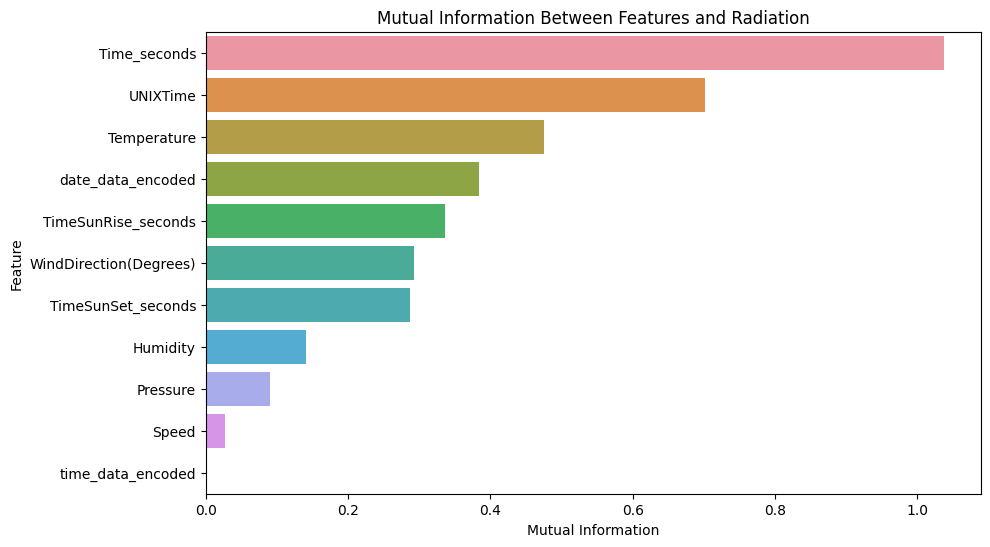

                   Feature  Mutual Information
6             Time_seconds            1.037253
0                 UNIXTime            0.702255
1              Temperature            0.475268
9        date_data_encoded            0.384617
7      TimeSunRise_seconds            0.335657
4   WindDirection(Degrees)            0.292606
8       TimeSunSet_seconds            0.287439
3                 Humidity            0.141478
2                 Pressure            0.090565
5                    Speed            0.026654
10       time_data_encoded            0.000571


In [24]:
#mutual information
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

#Seperate the target variable
X = data.drop(columns=['Radiation'])
y = data['Radiation']

mi = mutual_info_regression(X, y)

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

#Sort by mutual information values to get the most informative features
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

#Visualize the mutual information using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information Between Features and Radiation')
plt.show()

# Print the mutual information DataFrame
print(mi_df)

In [25]:
#feature selection 1st step using RFR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Define the features (X) and the target (y)
X = data.drop(columns=['Radiation'])
y = data['Radiation']

# Initialize the model
model = RandomForestRegressor()

# Initialize RFE and fit the model
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Get the ranking of features
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})
selected_features = selected_features.sort_values(by='Ranking')
print(selected_features)

                   Feature  Ranking
0                 UNIXTime        1
1              Temperature        1
3                 Humidity        1
4   WindDirection(Degrees)        1
6             Time_seconds        1
2                 Pressure        2
8       TimeSunSet_seconds        3
9        date_data_encoded        4
5                    Speed        5
7      TimeSunRise_seconds        6
10       time_data_encoded        7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.128e+08, tolerance: 3.262e+05
  model = cd_fast.enet_coordinate_descent(


UNIXTime: -0.0001359174571286691
Temperature: 44.34499796891873
Pressure: -396.61692214009344
Humidity: 0.6028392350606367
WindDirection(Degrees): -0.25563877727806067
Speed: 5.532685612245117
Time_seconds: -0.0019523137212314177
TimeSunRise_seconds: 0.0009800327219634981
TimeSunSet_seconds: 0.005644078327079509
date_data_encoded: 14.365044804136046
time_data_encoded: 0.0


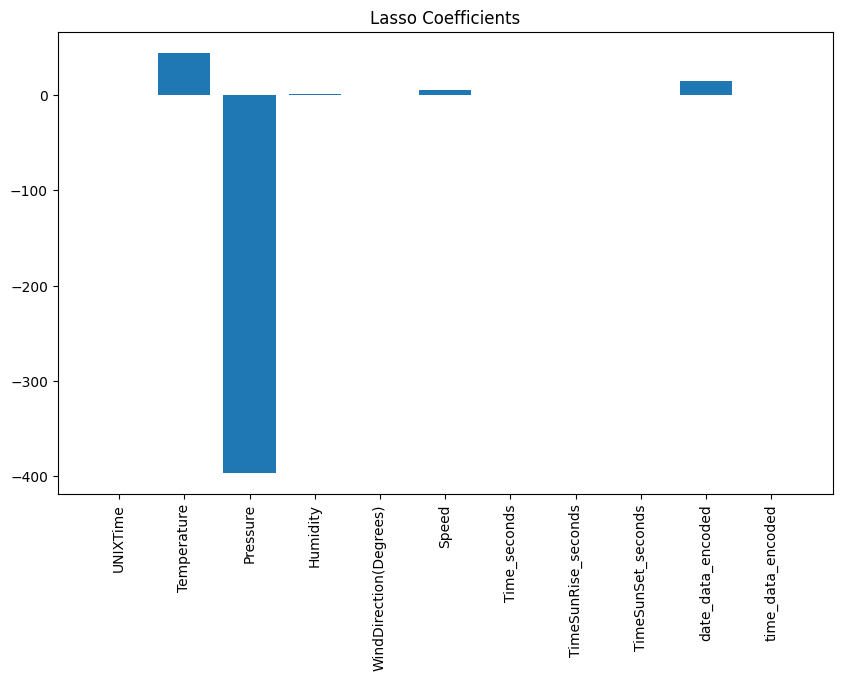

In [27]:
#lasso for feature selection
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

# Define the model with a small alpha value
lasso = Lasso(alpha=0.01)  # Alpha controls the regularization strength
lasso.fit(X, y)

# Get the coefficients of the features
coefficients = lasso.coef_

for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=90)
plt.title("Lasso Coefficients")
plt.show()

In [ ]:
#Features has been selected Time_seconds, UNIXTime, Temperature, Humidity, Speed, WindDirection(Degrees), and TimeSunSet_seconds.


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features for KNN model
features = ['Time_seconds', 'UNIXTime', 'Temperature', 'WindDirection(Degrees)', 'TimeSunSet_seconds']
target = 'Radiation'

# Extract features and target variable
X = data[features]
y = data[target]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (26148, 5)
X_test shape: (6538, 5)
y_train shape: (26148,)
y_test shape: (6538,)


Train R2: 0.9318, Test R2: 0.8908
Train MAE: 35.9835, Test MAE: 45.3803
Train RMSE: 82.5563, Test RMSE: 104.1739


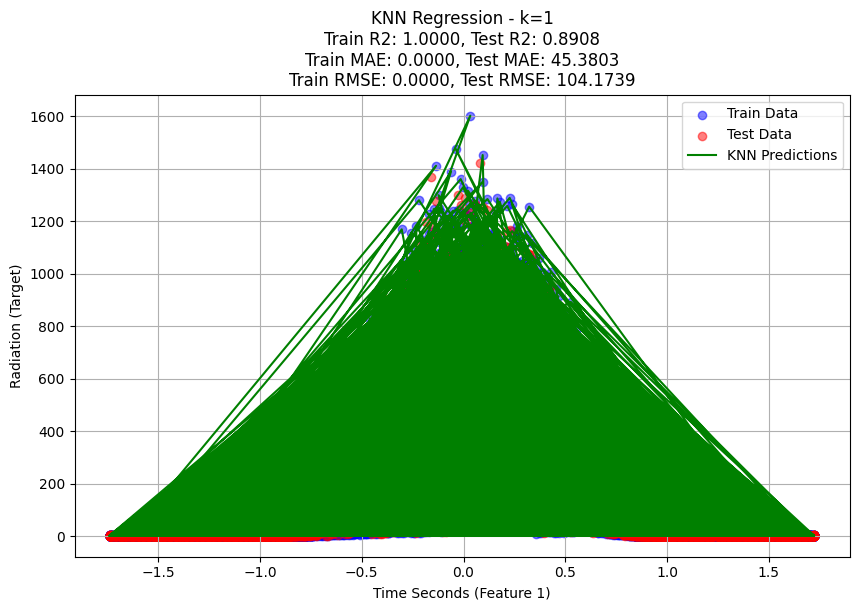

In [44]:
#the model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.animation import FuncAnimation

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on training data
knn.fit(X_train, y_train)

# Predict on the train and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

# Plotting the results and animating model evaluation
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for training data
sc_train = ax.scatter(X_train[:, 0], y_train, color='blue', label='Train Data', alpha=0.5)

# Create a scatter plot for test data
sc_test = ax.scatter(X_test[:, 0], y_test, color='red', label='Test Data', alpha=0.5)

# Create a line plot for KNN predictions
line, = ax.plot([], [], color='green', label='KNN Predictions')

# Update function for animation
def update(frame):
    knn.n_neighbors = frame  # Animate with different k values
    knn.fit(X_train, y_train)  # Fit the model again with the updated k value
    y_pred = knn.predict(X_train)
    
    # Update the line plot
    line.set_data(X_train[:, 0], y_pred)
    
    # Display the metrics at each frame
    train_r2 = r2_score(y_train, y_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    ax.set_title(f"KNN Regression - k={frame}\n"
                 f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}\n"
                 f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}\n"
                 f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    return line,



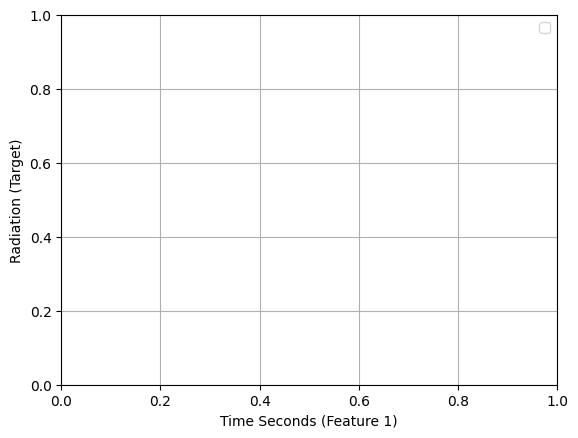

In [48]:
# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, 21), interval=500, blit=True)

# Show the animation
plt.legend()
plt.xlabel("Time Seconds (Feature 1)")
plt.ylabel("Radiation (Target)")
plt.grid(True)
plt.show()

# To save the animation to a file
ani.save("knn_model_animation.gif", writer="imagemagick", fps=2)

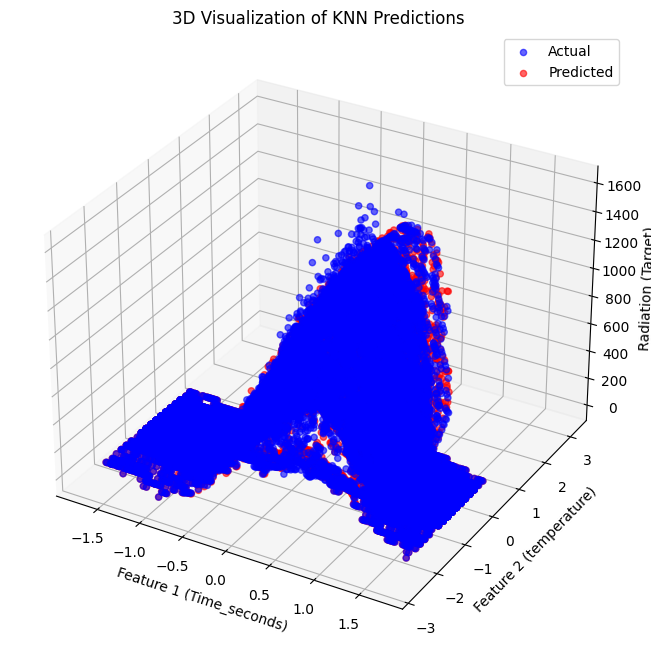

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming the features are indexed properly in X_train
feature_x_idx = 0  # First feature (e.g., Time_seconds)
feature_y_idx = 2  # Second feature (e.g., UNIXTime)

# Prepare data for 3D plot
x = X_train[:, feature_x_idx]
y = X_train[:, feature_y_idx]
z_actual = y_train  # Actual target values
z_pred = knn.predict(X_train)  # Predicted values using the trained KNN model

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual values
ax.scatter(x, y, z_actual, c='blue', label='Actual', alpha=0.6)

# Scatter predicted values
ax.scatter(x, y, z_pred, c='red', label='Predicted', alpha=0.6)

# Labels and legend
ax.set_title("3D Visualization of KNN Predictions")
ax.set_xlabel("Feature 1 (Time_seconds)")
ax.set_ylabel("Feature 2 (temperature)")
ax.set_zlabel("Radiation (Target)")
ax.legend()
plt.show()


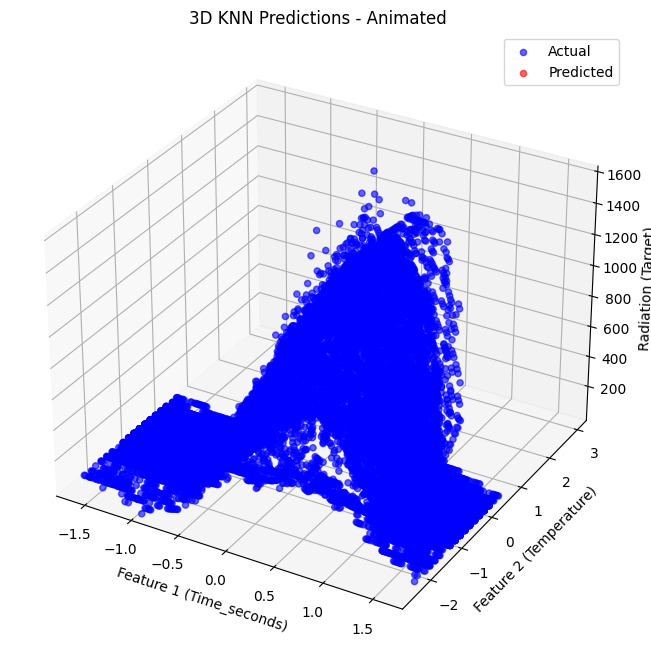

In [58]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Initialize the 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Setting labels
ax.set_title("3D KNN Predictions - Animated")
ax.set_xlabel("Feature 1 (Time_seconds)")
ax.set_ylabel("Feature 2 (Temperature)")
ax.set_zlabel("Radiation (Target)")

# Define axis limits
ax.set_xlim(np.min(X_train[:, 0]), np.max(X_train[:, 0]))
ax.set_ylim(np.min(X_train[:, 2]), np.max(X_train[:, 2]))
ax.set_zlim(np.min(y_train), np.max(y_train))

# Scatter for actual values (initial setup)
sc_actual = ax.scatter(X_train[:, 0], X_train[:, 2], y_train, c='blue', label='Actual', alpha=0.6)

# Scatter for predicted values (empty initially)
sc_pred = ax.scatter([], [], [], c='red', label='Predicted', alpha=0.6)

ax.legend()

# Update function for animation
def update(k):
    knn.n_neighbors = k  # Update the number of neighbors
    knn.fit(X_train, y_train)  # Refit the model
    z_pred = knn.predict(X_train)  # Predict on training data

    # Update scatter data
    sc_actual._offsets3d = (X_train[:, 0], X_train[:, 2], y_train)
    sc_pred._offsets3d = (X_train[:, 0], X_train[:, 2], z_pred)

    ax.set_title(f"3D KNN Predictions - k={k}")
    return sc_pred, sc_actual

# Create animation
ani = FuncAnimation(fig, update, frames=range(1, 21), interval=500, blit=False)

# Show animation
plt.show()

# Save animation to file
ani.save("knn_3d_animation_fixed.gif", writer="imagemagick", fps=2)
